# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [42]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()
hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [43]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()
clean_hospital_read_df.to_excel('hospital_readmissions.xlsx')
clean_hospital_read_df.columns = ['Hospital_Name', 'Provider_Number', 'State', 'Measure_Name',
       'Number_of_Discharges', 'Footnote', 'Excess_Readmission_Ratio',
       'Predicted_Readmission_Rate', 'Expected_Readmission_Rate',
       'Number_of_Readmissions', 'Start_Date', 'End_Date']


/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


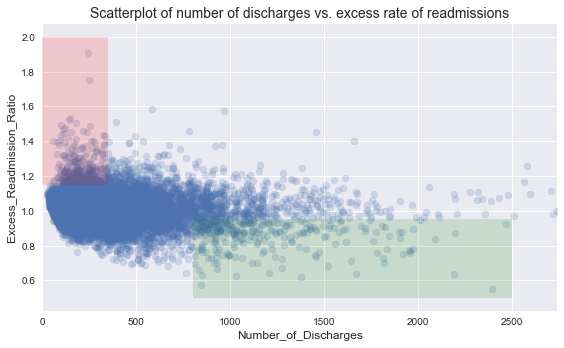

In [210]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number_of_Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess_Readmission_Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number_of_Discharges', fontsize=12)
ax.set_ylabel('Excess_Readmission_Ratio', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<h3>A. Do you agree with the above analysis and recommendations? Why or why not?</h3>
<h3>Solution</h3>
Looking at the solution below, even though there is a negative correlation between the number of discharges and the excess readmission ration, that correlation is weak. We should run hypothesis tests to determine if the difference is statistically significant and then propose solutions

In [211]:
#very weak negative correlation between Number of discharges and excess readmission ratio
np.corrcoef(x,y) 

array([[ 1.        , -0.09309554],
       [-0.09309554,  1.        ]])

<h3>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</h3>

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

<h2>Solution 1: Setting up a hypothesis test:</h2>
1. H0: u1 !> u2
    + u1 = Mean Readmission Ratio for Hospitals with number of discharges < 100
    + u2 = Mean Readmission Ratio for Hospitals with number of discharges > 1000
2. H1: u1 > u2
3. Reject H0 if p < 0.01

In [223]:
print("H0: Mean readmission ratio for hospitals w/ discharges<100 = Mean Readmission Ratio for Hospitals w/ discharges>1000")
def diff_of_means(data1,data2):
    '''Calculate difference in means of two datapoints'''
    return(np.mean(data1) - np.mean(data2))

def permutation_sample(data1,data2):
    '''Combine two data sets and then split it to get permutation samples for two new data sets'''
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1,perm_sample_2

def draw_perm_reps(data1,data2,func,size=1):
    '''Compute test statistic by drawing permuatation samples from two data sets'''
    perm_reps = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2= permutation_sample(data1,data2)
        perm_reps[i] = func(perm_sample_1,perm_sample_2)
    return perm_reps
        
low_discharge = clean_hospital_read_df[clean_hospital_read_df['Number_of_Discharges']<100]
high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number_of_Discharges']>=1000]
p_value = np.sum((perm_replicates)>=empirical_diff)/100000
empirical_diff = diff_of_means(low_discharge['Excess_Readmission_Ratio'],high_discharge['Excess_Readmission_Ratio'])
print("Observed difference in mean readmission ratio:",empirical_diff)
perm_replicates = draw_perm_reps(low_discharge['Excess_Readmission_Ratio'],high_discharge['Excess_Readmission_Ratio'],diff_of_means
                                ,100000)
print("Probability of observing a difference as high as observed if null hypothesis is true:",p_value)
if(p_value > 0.01):
    print("For p-value {}, at significance level 0.01 we fail to reject the null hypothesis.".format(p_value))
else:
    print("For p-value {}, at significance level 0.01 we can reject the null hypothesis.".format(p_value))
        

H0: Mean readmission ratio for hospitals w/ discharges<100 = Mean Readmission Ratio for Hospitals w/ discharges>1000
Observed difference in mean readmission ratio: 0.044284082926970836


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Probability of observing a difference as high as observed if null hypothesis is true: 0.0
For p-value 0.0, at significance level 0.01 we can reject the null hypothesis.


<h2>Solution 2: Using Z-score to test the null hypothesis:</h2>
1. Plotting excess readmission ratio to check if data follows normal distribution
2. Since data is normally distributed and there are > 30 observations for hospitals with less than 100 discharges as well as for hospitals with discharges more than 1000, we can conduct a Z test
3. We will test the null hypothesis that mean discharge rate for both groups is equal.
4. Reject the null hypothesis if Z > 2.58 or Z < -2.58


0.0799665803824
At significance level 0.01 and with a Z score of 10.02706738486565 we can reject the null hypothesis. 


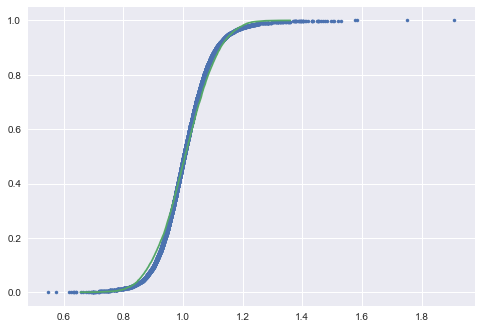

In [218]:
new_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df.Excess_Readmission_Ratio)]
y = new_df.Excess_Readmission_Ratio

def ecdf(data):
    x=np.sort(data)
    n = len(data)
    y=np.arange(1,n+1)/n
    return x,y

samples = np.random.normal(np.mean(y),np.std(y),10000)
x_theor,y_theor = ecdf(samples)
x_err,y_err = ecdf(y)
plt.plot(x_err,y_err,marker='.',linestyle='none')
plt.plot(x_theor,y_theor)


n1=len(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges<=100])
n2 = len(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges>1000])
u1 = np.mean(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges<=100])
u2 = np.mean(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges>1000])
s1=np.std(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges<=100])
s2=np.std(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges>1000])
sp=np.sqrt( ( ((n1-1)*(s1**2)) + ((n2-1)*(s2**2)) ) / (n1+n2-2))
print(Sp)
Z_num = u1-u2
Z_den = sp * np.sqrt(1/n1 + 1/n2)
Z = Z_num/Z_den
if(Z>2.58 or Z<-2.58):
   print("At significance level 0.01 and with a Z score of {} we can reject the null hypothesis. ".format(Z))
else:
   print("At significance level 0.01 and with a Z score of {} we fail to reject the null hypothesis. ".format(Z))

<h2>4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</h2>

<h2> Questions asked:</h2>
1. What is the normal range for the Excess Readmission Ratio? : <b>[1.0052923744395947, 1.0097106727066172]</b>


In [235]:
#What readmission Ratio should we condsider to be abnormal
from scipy import stats
z_critical = stats.norm.ppf(q=0.995)
def bootstrap_replicate_1d(data,func):
    return(func(np.random.choice(data,len(data))))

def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

bs_replicates = draw_bs_reps(new_df.Excess_Readmission_Ratio,np.mean,10000)
sem = np.std(new_df.Excess_Readmission_Ratio)/np.sqrt(len(new_df.Excess_Readmission_Ratio))
margin_of_error = z_critical*sem
confidence_interval = [np.mean(bs_replicates) - margin_of_error, np.mean(bs_replicates) + margin_of_error]
print(confidence_interval)

2.57582930355
[1.0052923744395947, 1.0097106727066172]


2. What is the mean Excess Readmission Ratio for hospitals with discharges < 100? : <b> 1.0226183501683506 </b>
3. Is the mean Readmission Ratio for low discharge Hospitals within normal range defined above? : <b> No </b>
4. Is the Mean Ratio for hospitals with low discharges significantly different from expected ratio of 1? : <b> Yes </b>
5. What is the mean Excess Readmission Ratio for hospitals with discharges > 100? : <b> 1.0057676562195774 </b>
6. Is the mean Readmission Ratio for high discharge Hospitals within normal range? : <b> Yes </b>



In [229]:
#Hypothesize 
#H0 = Mean Excess Admission Ratio of low discharge hospitals !> 1
#H1 = Mean Excess Admission Ratio of low discharge hospitals >1
print("Mean Excess Readmission Ratio for low discharge hospitals:",np.mean(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges<100]))
print("Mean Excess Readmission Ratio for high discharge hospitals:",np.mean(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges>1000]))
print("Mean Excess Readmission Ratio for all hospitals:",np.mean(new_df['Excess_Readmission_Ratio']))

true_mean = 1
sample_mean = np.mean(new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges<100])
diff_obs = sample_mean-true_mean
data_shifted = new_df['Excess_Readmission_Ratio'][new_df.Number_of_Discharges<100] - sample_mean+1
print(diff_obs)
def diff_from_true_ratio(data):
    return(np.mean(data)-true_mean)

bs_replicates = draw_bs_reps(data_shifted,diff_from_true_ratio,10000)
p_value = np.sum(bs_replicates>=diff_obs)/10000
print(p_value)


Mean Excess Readmission Ratio for low discharge hospitals: 1.0226183501683506
Mean Excess Readmission Ratio for high discharge hospitals: 0.9783354211663071
Mean Excess Readmission Ratio for all hospitals: 1.0075037835957146
0.022618350168350565
0.0


<h2>  5. Look at the scatterplot above. </h2>
+ What are the advantages and disadvantages of using this plot to convey information? : 
<b> Scatter plots easily show the comparison between two metrics and are easy to interpret. However, the scatter plot shown does not give a clear intuition that excess readmission ration descreases as number of discharges increases. </b>
+ Construct another plot that conveys the same information in a more direct manner.
<b> Constructing a regression plot with buckets for hospital discharge rates might provide a more direct view of the correlation between number of discharges and excess readmission rate

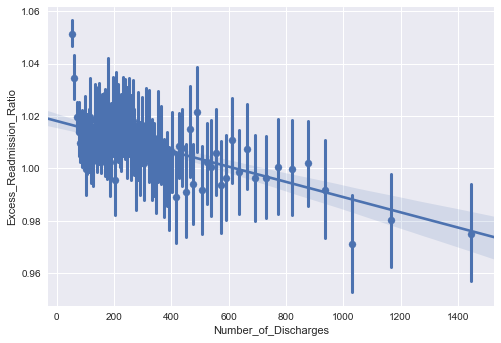

In [239]:
sns.regplot(y='Excess_Readmission_Ratio',x='Number_of_Discharges',data = new_df,x_bins=80)

<h2>Conclusion:</h2>
1. <b>The difference between excess readmission rates between hospitals with low and high discharge rates is statistically significant.</b> However some hospitals with low discharge rates do have low readmission rates, so its not immediately clear that excess readmission rate is based purely on the number of beds in a hospital.
2. <b>While there is stastically significant difference, it might not be practically significant.</b> Practical significance and level of tolerance for readmission ratio should be defined by decision making body of CMS.
3. <b>Imposing fines on hospitals with excess readmission rates might be offset by the increased revenue coming in from readmissions.</b> Therefore simply reducing medicare payments or imposing fines for readmission might be acceptable to hospitals if they are able to make up for it in increased readmission revenue.
4. <b>To effectively discourage hospitals from excess readmission, medicare payments could be provided on a per episode basis - including initial hospitalization, post care and readmission within a set time window depending on diagnosis group.</b> This would discourage hospitals from providing sub-par care that could result in readmission when no added revenue would come from such readmission.